# Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from matplotlib import transforms
from matplotlib.patches import ConnectionPatch

# Paleta de cores

In [3]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

# Função texto

In [4]:
# Função para personalização do texto
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

# Dados

In [5]:
dados = pd.read_csv('/content/drive/MyDrive/ALURA/IMP_2024.csv', sep=';')
dados

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,2024,10,84818092,11,161,SC,1,927800,344,90,6823,77,10
1,2024,4,90304090,11,249,SP,4,817700,1,9,4890,147,7
2,2024,1,39172300,10,23,PE,4,417901,1128,1128,28129,20688,7
3,2024,6,85444200,10,160,MG,4,817700,824,824,66958,11276,45
4,2024,10,84439942,10,190,SC,4,817600,3,3,2060,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273703,2024,8,61051000,11,160,ES,1,717600,1936,427,20242,801,11
2273704,2024,2,87084090,11,275,SP,4,817700,47,9,323,53,0
2273705,2024,5,85446000,10,23,RS,4,817600,10,10,8586,168,23
2273706,2024,4,39100090,10,23,AM,4,227700,2,2,95,939,1


In [6]:
colunas = ['VL_FOB', 'VL_FRETE', 'VL_SEGURO']
dados[colunas] = dados[colunas].astype('float64')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273708 entries, 0 to 2273707
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CO_ANO      int64  
 1   CO_MES      int64  
 2   CO_NCM      int64  
 3   CO_UNID     int64  
 4   CO_PAIS     int64  
 5   SG_UF_NCM   object 
 6   CO_VIA      int64  
 7   CO_URF      int64  
 8   QT_ESTAT    int64  
 9   KG_LIQUIDO  int64  
 10  VL_FOB      float64
 11  VL_FRETE    float64
 12  VL_SEGURO   float64
dtypes: float64(3), int64(9), object(1)
memory usage: 225.5+ MB


In [8]:
df_pv = dados.query('CO_NCM == 85414300').reset_index(drop=True)
df_pv

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,2024,3,85414300,11,160,ES,1,727600,35900,1138954,2126890.0,161950.0,30.0
1,2024,9,85414300,11,160,ES,1,727600,6499640,3761482,6535392.0,1357800.0,1602.0
2,2024,9,85414300,11,160,PI,1,1017700,52221,2000064,3750761.0,217516.0,3819.0
3,2024,10,85414300,11,160,PR,1,417902,2220,62826,108425.0,14100.0,0.0
4,2024,6,85414300,11,160,TO,1,927800,2960,80512,178355.0,25400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2024,1,85414300,11,160,RS,1,817800,50,123,4500.0,61.0,8.0
691,2024,5,85414300,11,160,GO,1,927700,2790,107415,207799.0,17250.0,386.0
692,2024,12,85414300,11,160,RJ,1,517800,740,24938,32727.0,6350.0,0.0
693,2024,1,85414300,11,160,SC,1,317900,2960,81440,192168.0,11200.0,114.0


# Via

In [9]:
via = df_pv.groupby('CO_VIA')['VL_FOB'].sum().sort_values(ascending=False).reset_index()
via['VL_FOB'] = via['VL_FOB'].astype('float64')
via['VL_FOB'] = via['VL_FOB']/1e9
via['VL_FOB_%'] = ((via['VL_FOB'] / via['VL_FOB'].sum()) * 100).round(2)
via

,CO_VIA,VL_FOB,VL_FOB_%
0,1,2.616676,99.97
1,4,0.000583,0.02
2,7,0.000076,0.00


# PV Geral

In [10]:
dados_sem_pv = dados.query('CO_NCM != 85414300').reset_index(drop=True)
dados_sem_pv.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,2024,10,84818092,11,161,SC,1,927800,344,90,6823.0,77.0,10.0
1,2024,4,90304090,11,249,SP,4,817700,1,9,4890.0,147.0,7.0
2,2024,1,39172300,10,23,PE,4,417901,1128,1128,28129.0,20688.0,7.0
3,2024,6,85444200,10,160,MG,4,817700,824,824,66958.0,11276.0,45.0
4,2024,10,84439942,10,190,SC,4,817600,3,3,2060.0,37.0,0.0


In [11]:
dados_geral = dados_sem_pv.groupby('CO_ANO')[['VL_FOB']].sum().reset_index()
dados_geral['Tipo'] = 'Outros produtos'
dados_geral

,CO_ANO,VL_FOB,Tipo
0,2024,2.602523e+11,Outros produtos


In [12]:
df_pv_geral = df_pv.groupby('CO_ANO')[['VL_FOB']].sum().reset_index()
df_pv_geral['Tipo'] = 'Módulos fotovoltaicos'
df_pv_geral

,CO_ANO,VL_FOB,Tipo
0,2024,2.617336e+09,Módulos fotovoltaicos


In [13]:
df_concatenado = pd.concat([dados_geral, df_pv_geral])

df_concatenado = df_concatenado[['Tipo', 'VL_FOB']].reset_index(drop=True)

df_concatenado

,Tipo,VL_FOB
0,Outros produtos,2.602523e+11
1,Módulos fotovoltaicos,2.617336e+09


In [14]:
df_concatenado['VL_FOB_%'] = ((df_concatenado['VL_FOB'] / df_concatenado['VL_FOB'].sum()) * 100).round(2)
df_concatenado

,Tipo,VL_FOB,VL_FOB_%
0,Outros produtos,2.602523e+11,99.0
1,Módulos fotovoltaicos,2.617336e+09,1.0


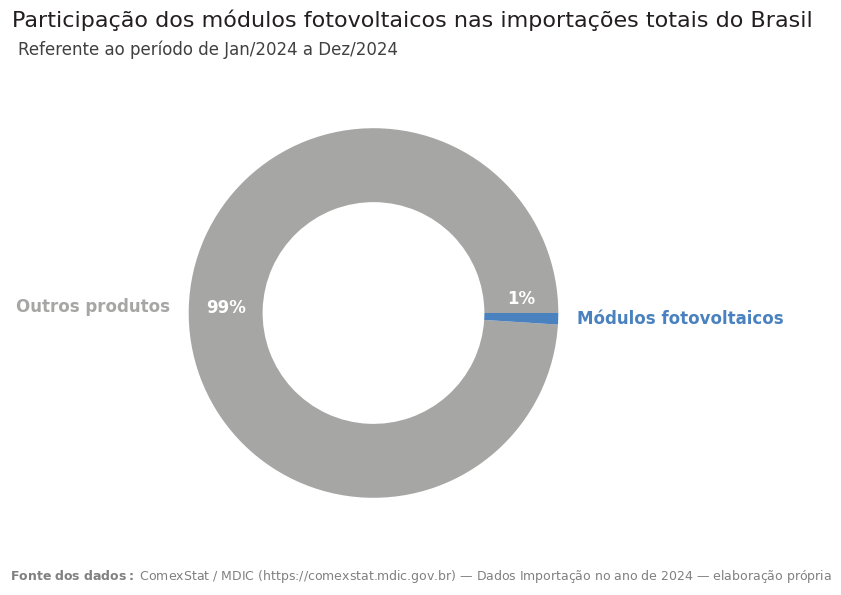

In [15]:
cores = [CINZA4, AZUL2]

fig, ax = plt.subplots(figsize=(10,6))

plt.title('Participação dos módulos fotovoltaicos nas importações totais do Brasil',
          fontsize=16,
          color=CINZA1,
          ha='right',
          x=1.45,
          y=1.1)

plt.suptitle('Referente ao período de Jan/2024 a Dez/2024',
             fontsize=12,
             color=CINZA2,
             ha='right',
             x=0.537,
             y=0.95)

ptc, text, autotexts = ax.pie(data=df_concatenado, x='VL_FOB', labels='Tipo',
                              autopct='%.0f%%',
                              pctdistance=0.8,
                              textprops={'size':12,
                                        'fontweight':'bold',
                                        'color':BRANCO},
                              startangle=0,
                              wedgeprops=dict(width=0.4),
                              colors=cores)

# Ajuste das cores das regiões relativas as fatias
for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

# Mover a primeira porcentagem 0,21% um pouco para cima
autotexts[1].set_y(autotexts[1].get_position()[1] + 0.1)

plt.figtext(0.56, 0.05,
            '$\\bf{Fonte}$ $\\bf{dos}$ $\\bf{dados:}$ ComexStat / MDIC (https://comexstat.mdic.gov.br) — Dados Importação no ano de 2024 — elaboração própria',
            ha='center', fontsize=9, color='gray')

plt.savefig('modulos_2024.png',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.2,
            facecolor='white')
plt.show()

As importações de módulos fotovoltaicos e equivalentes, correspondem à aproximadamente 1% (valores FOB) das importações totais do Brasil no ano de 2024.

Módulos fotovoltaicos = USD 2.617.336.000,00

Outros produtos = USD 260.252.300.000,00

# Por origem

In [16]:
df_pv.CO_PAIS.unique()

array([160, 355, 351, 249, 386, 245, 776, 365, 141, 383, 607, 190, 741,
       399,  69, 791, 573,  23, 767, 455, 267])

In [17]:
pv_origem = df_pv.groupby('CO_PAIS')[['VL_FOB', 'VL_FRETE', 'VL_SEGURO']].sum().sort_values('VL_FOB', ascending=False).reset_index()
pv_origem

,CO_PAIS,VL_FOB,VL_FRETE,VL_SEGURO
0,160,2.611917e+09,256066550.0,1473960.0
1,351,2.545649e+06,316506.0,1147.0
2,776,1.572229e+06,44010.0,884.0
3,365,8.349080e+05,134507.0,213.0
4,741,1.340930e+05,30850.0,242.0
5,141,1.304550e+05,6383.0,65.0
6,767,5.654400e+04,7.0,23.0
7,607,4.171400e+04,1314.0,0.0
8,455,2.949900e+04,6000.0,12.0
9,249,2.339800e+04,7288.0,521.0


In [18]:
mapa_paises = {
    160: 'China',
    355: 'Hungria',
    351: 'Hong Kong',
    249: 'Estados Unidos',
    386: 'Itália',
    245: 'Espanha',
    776: 'Tailândia',
    365: 'Indonésia',
    141: 'Camboja',
    383: 'Israel',
    607: 'Portugal',
    190: 'Coreia do Sul',
    741: 'Cingapura',
    399: 'Japão',
    69: 'Austrália',
    791: 'República Tcheca',
    573: 'Países Baixos (Holanda)',
    23: 'Alemanha',
    767: 'Suíça',
    455: 'Malásia',
    267: 'Filipinas'
}

In [19]:
pv_origem['PAIS_ORIGEM'] = pv_origem['CO_PAIS'].map(mapa_paises).fillna('Desconhecido')
pv_origem.head()

,CO_PAIS,VL_FOB,VL_FRETE,VL_SEGURO,PAIS_ORIGEM
0,160,2.611917e+09,256066550.0,1473960.0,China
1,351,2.545649e+06,316506.0,1147.0,Hong Kong
2,776,1.572229e+06,44010.0,884.0,Tailândia
3,365,8.349080e+05,134507.0,213.0,Indonésia
4,741,1.340930e+05,30850.0,242.0,Cingapura


In [20]:
pv_origem = pv_origem[['PAIS_ORIGEM', 'VL_FOB']]

In [21]:
pais_excluir = 'China'

df_filtrado = pv_origem[pv_origem['PAIS_ORIGEM'] != pais_excluir].copy()

outros = pd.DataFrame({
    'PAIS_ORIGEM': ['Demais países'],
    'VL_FOB': [df_filtrado['VL_FOB'].sum()]
})

pv_resumo = pd.concat([
    pv_origem[pv_origem['PAIS_ORIGEM'] == pais_excluir],
    outros
])

pv_resumo

,PAIS_ORIGEM,VL_FOB
0,China,2.611917e+09
0,Demais países,5.418823e+06


In [22]:
pv_resumo['VL_FOB_%'] = ((pv_resumo['VL_FOB'] / pv_resumo['VL_FOB'].sum()) * 100).round(2)
pv_resumo

,PAIS_ORIGEM,VL_FOB,VL_FOB_%
0,China,2.611917e+09,99.79
0,Demais países,5.418823e+06,0.21


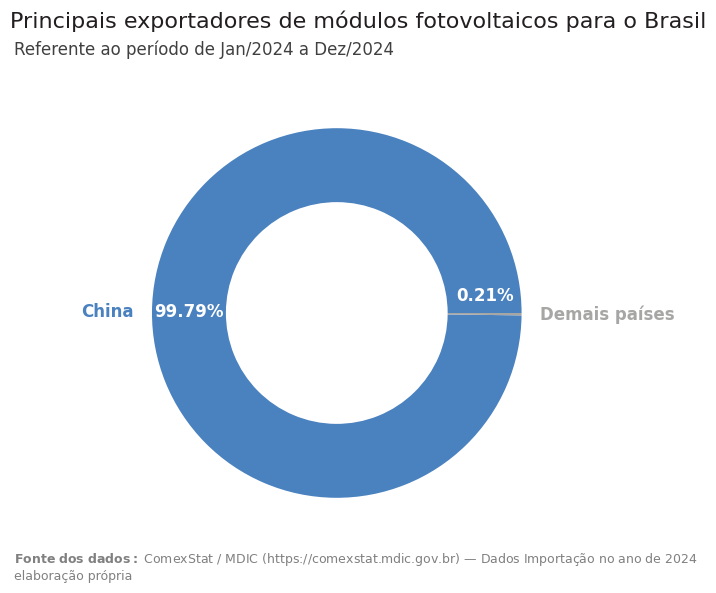

In [23]:
cores = [AZUL2, CINZA4]

fig, ax = plt.subplots(figsize=(10,6))

plt.title('Principais exportadores de módulos fotovoltaicos para o Brasil',
          fontsize=16,
          color=CINZA1,
          ha='right',
          x=1.3,
          y=1.1)

plt.suptitle('Referente ao período de Jan/2024 a Dez/2024',
             fontsize=12,
             color=CINZA2,
             ha='right',
             x=0.57,
             y=0.95)

ptc, text, autotexts = ax.pie(data=pv_resumo, x='VL_FOB', labels='PAIS_ORIGEM',
                              autopct='%.2f%%',
                              pctdistance=0.8,
                              textprops={'size':12,
                                        'fontweight':'bold',
                                        'color':BRANCO},
                              startangle=0,
                              wedgeprops=dict(width=0.4),
                              colors=cores)

# Ajuste das cores das regiões relativas as fatias
for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

# Mover a primeira porcentagem 0,21% um pouco para cima
autotexts[1].set_y(autotexts[1].get_position()[1] + 0.1)

plt.figtext(0.19, 0.05,
            '$\\bf{Fonte}$ $\\bf{dos}$ $\\bf{dados:}$ ComexStat / MDIC (https://comexstat.mdic.gov.br) — Dados Importação no ano de 2024\nelaboração própria',
            ha='left', fontsize=9, color='gray')

plt.show()

A China possui a incrível fatia de 99,79% do mercado de módulos fotovoltaicos, quando se trata da exportação para o Brasil. Demais países somados possuem apenas 0,21% desse mercado.

Sendo esse valores respectivamento equivalentes à 2.611.917.000,00 de dólares e 5.418.823,00 de dólares.

A análise compreende o ano de 2024 (de Janeiro a Dezembro).

Fonte dos dados: Ministério do Desenvolvimento, Indústria, Comércio e Serviços (MDIC) – ComexStat (https://comexstat.mdic.gov.br
).
Elaboração própria com base nos microdados oficiais de comércio exterior do Brasil.

# Por estado

In [24]:
pv_estado = df_pv.query('CO_PAIS == 160').reset_index(drop=True)
pv_estado = pv_estado.groupby('SG_UF_NCM')[['QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB']].sum().sort_values('VL_FOB', ascending=False).reset_index()
pv_estado

,SG_UF_NCM,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,SP,10663519,330847218,642294784.0
1,SC,31266729,332547277,633456797.0
2,MG,5487149,177224238,460765846.0
3,PR,5613279,90895206,181484203.0
4,CE,199078467,64254610,169076284.0
5,RN,1373767,43681847,129116336.0
6,PE,91756332,49634204,104679811.0
7,ES,93571335,51817173,97786758.0
8,BA,1069582,33536129,65866117.0
9,PI,616023,23516088,48823947.0


In [25]:
estados_excluir = ['PI', 'RS', 'MS', 'PB', 'PA', 'GO', 'AM', 'MT', 'RJ', 'MA', 'RR', 'RO', 'TO', 'DF']

estado_filtrado = pv_estado[pv_estado['SG_UF_NCM'].isin(estados_excluir)].copy()

outros_estados = pd.DataFrame({
    'SG_UF_NCM': ['Demais UFs'],
    'VL_FOB': [estado_filtrado['VL_FOB'].sum()]
})

estados_principais = pv_estado[~pv_estado['SG_UF_NCM'].isin(estados_excluir)]

estado_resumo = pd.concat([estados_principais, outros_estados], ignore_index=True)

estado_resumo = estado_resumo[['SG_UF_NCM', 'VL_FOB']]
estado_resumo['VL_FOB'] = round(estado_resumo['VL_FOB'] / 1e6, 2)
estado_resumo

,SG_UF_NCM,VL_FOB
0,SP,642.29
1,SC,633.46
2,MG,460.77
3,PR,181.48
4,CE,169.08
5,RN,129.12
6,PE,104.68
7,ES,97.79
8,BA,65.87
9,Demais UFs,127.39


In [26]:
estado_resumo['VL_FOB_%'] = ((estado_resumo['VL_FOB'] / estado_resumo['VL_FOB'].sum()) * 100).round(2)
estado_resumo

,SG_UF_NCM,VL_FOB,VL_FOB_%
0,SP,642.29,24.59
1,SC,633.46,24.25
2,MG,460.77,17.64
3,PR,181.48,6.95
4,CE,169.08,6.47
5,RN,129.12,4.94
6,PE,104.68,4.01
7,ES,97.79,3.74
8,BA,65.87,2.52
9,Demais UFs,127.39,4.88


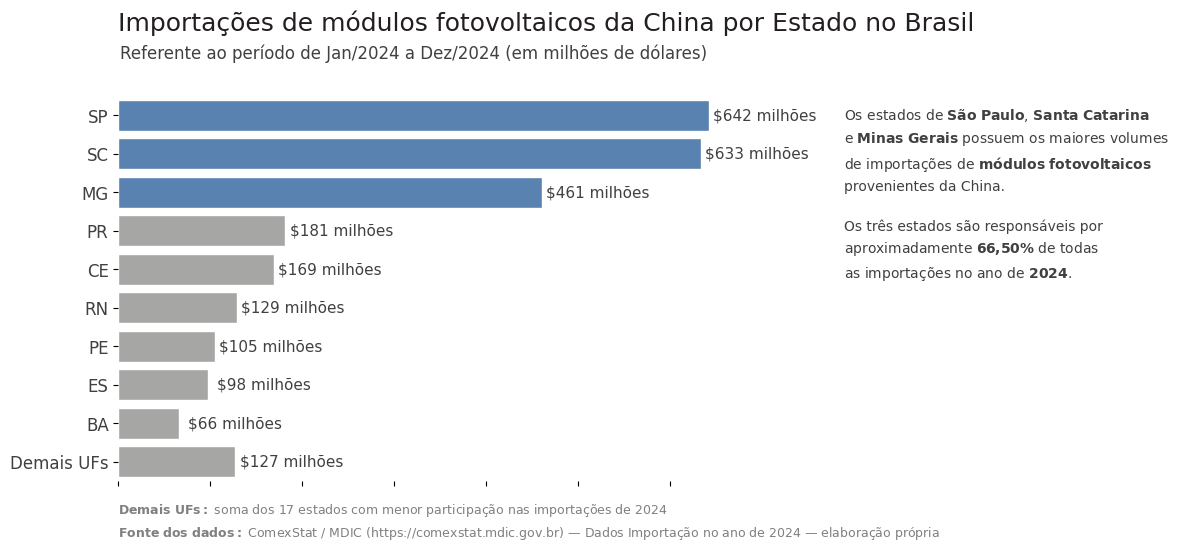

In [27]:
est = ['SP', 'SC', 'MG']
cores = []
for valor in estado_resumo['SG_UF_NCM']:
    if valor in est:
        cores.append(AZUL2)
    else:
        cores.append(CINZA4)

fig, ax = plt.subplots(figsize=(8,5))
sns.set_theme(style='white')

ax = sns.barplot(data=estado_resumo,
                 y='SG_UF_NCM',
                 x='VL_FOB',
                 palette=cores,
                 legend=False,
                 hue='SG_UF_NCM')

ax.set_title('Importações de módulos fotovoltaicos da China por Estado no Brasil',
             loc='left',
             fontsize=18,
             color=CINZA1,
             y=1.15)

ax.text(0.95, 1.11, 'Referente ao período de Jan/2024 a Dez/2024 (em milhões de dólares)',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=12,
        ha='right',
        va='center')


ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
sns.despine(bottom=True, left=True)

for i, valor in enumerate(estado_resumo['VL_FOB']):
    qtd = f'${valor:,.0f} milhões'
    offset = max(estado_resumo['VL_FOB']) * 0.095
    ax.text(x=valor + offset, y=i, s=qtd, color=CINZA2, fontsize=11, ha='center', va='center')

plt.figtext(0.638, 0,
            '$\\bf{Fonte}$ $\\bf{dos}$ $\\bf{dados:}$ ComexStat / MDIC (https://comexstat.mdic.gov.br) — Dados Importação no ano de 2024 — elaboração própria',
            ha='center', fontsize=9, color='gray')

plt.figtext(0.468, 0.045,
            '$\\bf{Demais}$ $\\bf{UFs:}$ soma dos 17 estados com menor participação nas importações de 2024',
            ha='center', fontsize=9, color='gray')

ax.text(1.17, 0.53,
        'Os estados de $\\bf{São}$ $\\bf{Paulo}$, $\\bf{Santa}$ $\\bf{Catarina}$\n'
        'e $\\bf{Minas}$ $\\bf{Gerais}$ possuem os maiores volumes\n'
        'de importações de $\\bf{módulos}$ $\\bf{fotovoltaicos}$\n'
        'provenientes da China.\n'
        '\nOs três estados são responsáveis por\n'
        'aproximadamente $\\bf{66{,}50\\%}$ de todas\n'
        'as importações no ano de $\\bf{2024}$.',
        transform=ax.transAxes,
        fontsize=10,
        linespacing=1.5,
        color=CINZA2)

plt.show()

# Por mes

In [28]:
pv_mensal = df_pv.groupby('CO_MES')[['VL_FOB']].sum().reset_index().sort_values('CO_MES')
pv_mensal

,CO_MES,VL_FOB
0,1,279912280.0
1,2,271955943.0
2,3,259006831.0
3,4,266072675.0
4,5,231633723.0
5,6,154487482.0
6,7,176540594.0
7,8,214239547.0
8,9,199914530.0
9,10,191101140.0


In [29]:
meses = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'Mai', 6:'Jun',
         7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'}

pv_mensal['MES'] = pv_mensal['CO_MES'].map(meses)
pv_mensal['VL_FOB'] = round(pv_mensal['VL_FOB'] / 1e6, 0)
pv_mensal

,CO_MES,VL_FOB,MES
0,1,280.0,Jan
1,2,272.0,Fev
2,3,259.0,Mar
3,4,266.0,Abr
4,5,232.0,Mai
5,6,154.0,Jun
6,7,177.0,Jul
7,8,214.0,Ago
8,9,200.0,Set
9,10,191.0,Out


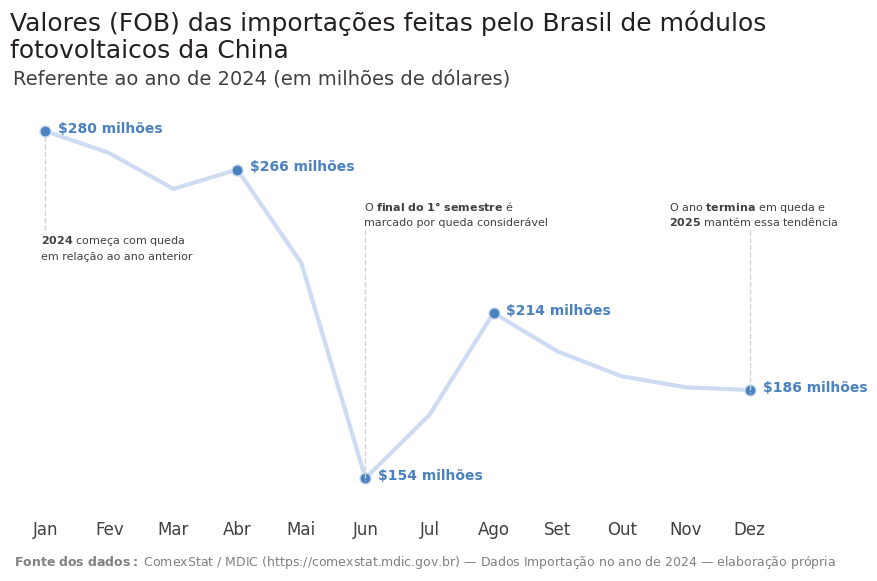

In [30]:
marks = [0, 3, 5, 7, 11]
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')

ax.plot(pv_mensal['MES'], pv_mensal['VL_FOB'], lw=3, color=AZUL6, marker='o', markersize=8, markerfacecolor=AZUL2, markevery=marks)

ax.set_title('Valores (FOB) das importações feitas pelo Brasil de módulos\nfotovoltaicos da China',
             fontsize=18,
             color=CINZA1,
             loc='left',
             pad=40)

ax.text(0.645, 1.09, 'Referente ao ano de 2024 (em milhões de dólares)',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=14,
        ha='right',
        va='center')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=10)

for i in marks:
    ax.text(x = ax.get_xticks()[i] + 0.2, y = pv_mensal['VL_FOB'][i] - 0.5,
            s = f'${pv_mensal['VL_FOB'][i]:.0f} milhões', color = AZUL2, weight = 'bold', fontsize = 10)

mark_text = [0, 5, 11]

for i in mark_text:
    ax.vlines(x=pv_mensal['MES'].iloc[i],
              ymin=pv_mensal['VL_FOB'].min() + 90,
              ymax=pv_mensal['VL_FOB'].iloc[i] - 1,
              colors='lightgray',
              linestyles='dashed',
              linewidth=1)

ax.text(0.04, 0.62,
        '$\\bf{2024}$ começa com queda\nem relação ao ano anterior',
        transform=ax.transAxes,
        fontsize=8,
        linespacing=1.5,
        color=CINZA2)

ax.text(0.457, 0.71,
        'O $\\bf{final}$ $\\bf{do}$ $\\bf{1°}$ $\\bf{semestre}$ é\nmarcado por queda considerável',
        transform=ax.transAxes,
        fontsize=8,
        linespacing=1.5,
        color=CINZA2)

ax.text(0.85, 0.71,
        'O ano $\\bf{termina}$ em queda e\n$\\bf{2025}$ mantém essa tendência',
        transform=ax.transAxes,
        fontsize=8,
        linespacing=1,
        color=CINZA2)

plt.figtext(0.54, -0.025,
            '$\\bf{Fonte}$ $\\bf{dos}$ $\\bf{dados:}$ ComexStat / MDIC (https://comexstat.mdic.gov.br) — Dados Importação no ano de 2024 — elaboração própria',
            ha='center', fontsize=9, color='gray')

plt.show()

# Composição Frete

In [31]:
meses_full = {1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho',
         7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}

In [32]:
frete = df_pv.groupby('CO_MES')[['VL_FOB', 'VL_FRETE', 'VL_SEGURO']].sum().reset_index().sort_values('CO_MES', ascending=False)
frete['MES'] = frete['CO_MES'].map(meses_full)
frete['Frete e Seguro'] = frete['VL_FRETE'] + frete['VL_SEGURO']
frete.rename(columns={'VL_FOB': 'Valor FOB'}, inplace=True)
frete = frete[['MES', 'Valor FOB', 'Frete e Seguro']]
frete = frete.set_index('MES')
frete

,Valor FOB,Frete e Seguro
MES,,
Dezembro,185567032.0,26571870.0
Novembro,186904115.0,29021004.0
Outubro,191101140.0,33190152.0
Setembro,199914530.0,34184269.0
Agosto,214239547.0,34245848.0
Julho,176540594.0,21324672.0
Junho,154487482.0,14875024.0
Maio,231633723.0,12637685.0
Abril,266072675.0,14064643.0


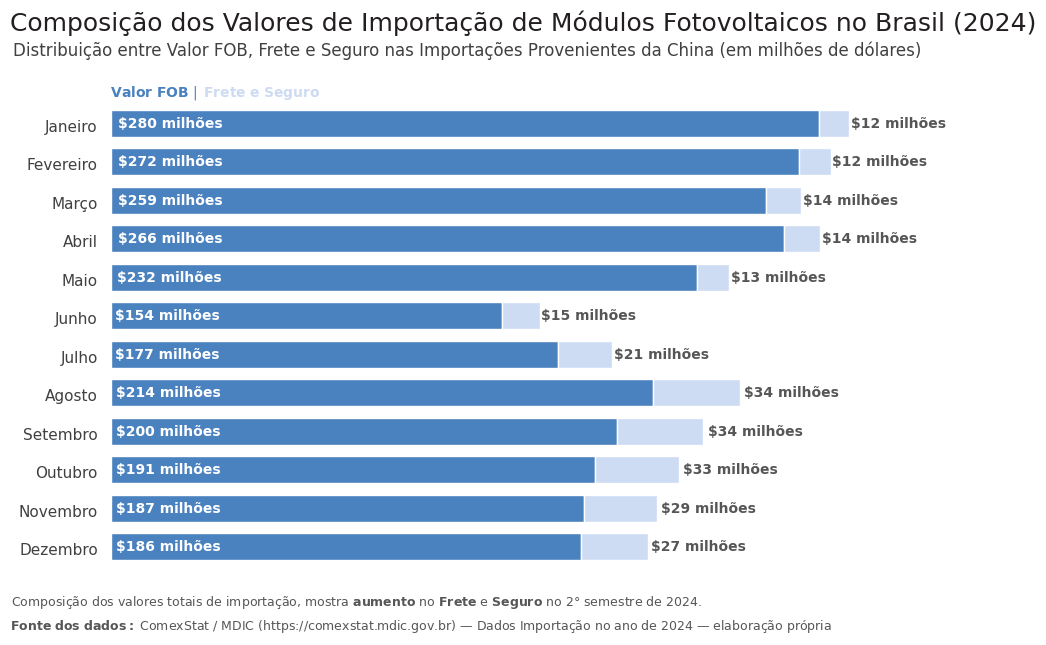

In [33]:
cores = [AZUL2, AZUL6]

fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='white')

frete.plot(kind='barh', stacked=True, color=cores, ax=ax, legend=False)

for container in ax.containers:
    for bar in container:
        bar.set_height(0.7)

ax.set_title('Composição dos Valores de Importação de Módulos Fotovoltaicos no Brasil (2024)',
             loc='left',
             fontsize=18,
             color=CINZA1,
             x=-0.13,
             y=1.15)

ax.text(1.046, 1.125, 'Distribuição entre Valor FOB, Frete e Seguro nas Importações Provenientes da China (em milhões de dólares)',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=12,
        ha='right',
        va='center')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels(frete.index, fontsize=11, color=CINZA2, va='center')
sns.despine(bottom=True, left=True)

for container in ax.containers:
    for bar in container:
        valor = bar.get_width()
        label = f'${(valor/1e6):,.0f} milhões'.replace(',', 'X').replace('.', ',').replace('X', '.')

        if valor > 4e7:
            ax.text(bar.get_x() + valor/100,
                    bar.get_y() + bar.get_height()/2,
                    label, color=BRANCO, fontsize=10, fontweight='bold',
                    ha='left', va='center')
        else:
            ax.text(bar.get_x() + 1.05*valor,
                    bar.get_y() + bar.get_height()/2,
                    label, color=CINZA3, fontsize=10, fontweight='bold',
                    ha='left', va='center')

plt.figtext(0.435, 0.01,
            '$\\bf{Fonte}$ $\\bf{dos}$ $\\bf{dados:}$ ComexStat / MDIC (https://comexstat.mdic.gov.br) — Dados Importação no ano de 2024 — elaboração própria',
            ha='center', fontsize=9, color=CINZA3)
plt.figtext(0.37, 0.05,
            'Composição dos valores totais de importação, mostra $\\bf{aumento}$ no $\\bf{Frete}$ e $\\bf{Seguro}$ no 2° semestre de 2024.',
            ha='center', fontsize=9, color=CINZA3)

texto_colorido(-2e6, 11.8, ' $\\bf{Valor}$ $\\bf{FOB}$ | || $\\bf{Frete}$ $\\bf{e}$ $\\bf{Seguro}$', cores = [cores], ax=ax, fontsize=10)

plt.show()

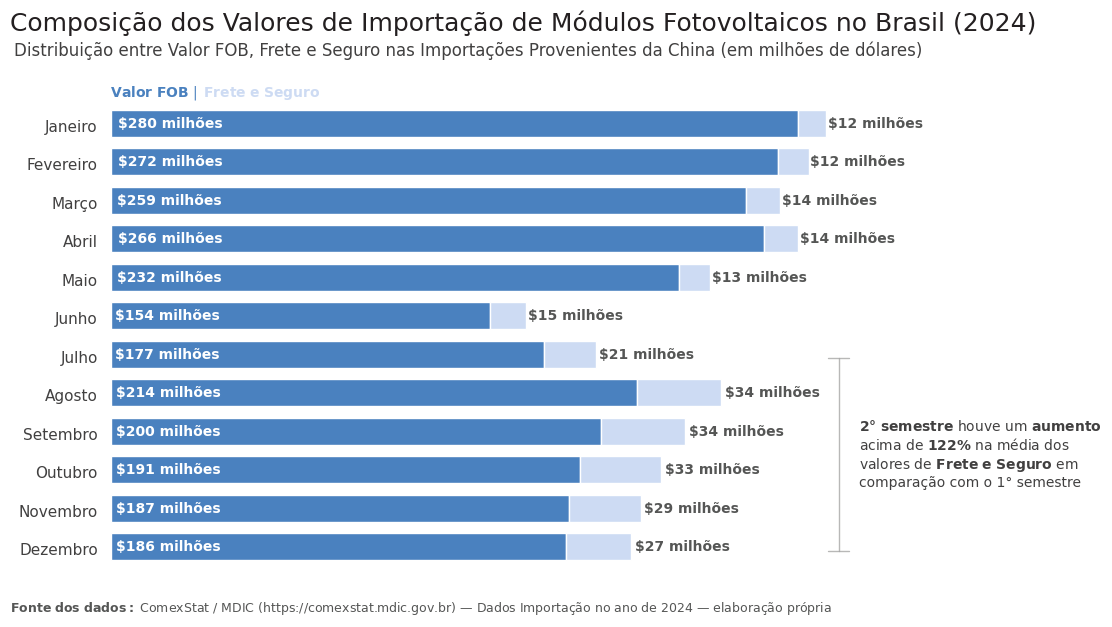

In [34]:
cores = [AZUL2, AZUL6]

fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='white')

frete.plot(kind='barh', stacked=True, color=cores, ax=ax, legend=False)

for container in ax.containers:
    for bar in container:
        bar.set_height(0.7)

ax.set_title('Composição dos Valores de Importação de Módulos Fotovoltaicos no Brasil (2024)',
             loc='left',
             fontsize=18,
             color=CINZA1,
             x=-0.13,
             y=1.15)

ax.text(1.047, 1.125, 'Distribuição entre Valor FOB, Frete e Seguro nas Importações Provenientes da China (em milhões de dólares)',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=12,
        ha='right',
        va='center')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels(frete.index, fontsize=11, color=CINZA2, va='center')
sns.despine(bottom=True, left=True)

for container in ax.containers:
    for bar in container:
        valor = bar.get_width()
        label = f'${(valor/1e6):,.0f} milhões'.replace(',', 'X').replace('.', ',').replace('X', '.')

        if valor > 4e7:
            ax.text(bar.get_x() + valor/100,
                    bar.get_y() + bar.get_height()/2,
                    label, color=BRANCO, fontsize=10, fontweight='bold',
                    ha='left', va='center')
        else:
            ax.text(bar.get_x() + 1.05*valor,
                    bar.get_y() + bar.get_height()/2,
                    label, color=CINZA3, fontsize=10, fontweight='bold',
                    ha='left', va='center')

plt.figtext(0.435, 0.04,
            '$\\bf{Fonte}$ $\\bf{dos}$ $\\bf{dados:}$ ComexStat / MDIC (https://comexstat.mdic.gov.br) — Dados Importação no ano de 2024 — elaboração própria',
            ha='center', fontsize=9, color=CINZA3)

texto_colorido(-2e6, 11.8, ' $\\bf{Valor}$ $\\bf{FOB}$ | || $\\bf{Frete}$ $\\bf{e}$ $\\bf{Seguro}$', cores = [cores], ax=ax, fontsize=10)

# Índices de Julho e Dezembro
y_julho = frete.index.get_loc('Julho')
y_dezembro = frete.index.get_loc('Dezembro')

# Coordenadas X
x_max = frete.max().max()
x_linha = x_max * 1.06  # posição da linha vertical
largura_regua = x_max * 0.03  # comprimento das linhas horizontais da régua

# Linha vertical (a “chave” principal)
ax.plot([x_linha, x_linha],
        [y_dezembro, y_julho],
        color=CINZA4,
        linewidth=1,
        alpha=0.8)

# Linhas horizontais no topo e base (efeito de régua)
ax.plot([x_linha - largura_regua/2, x_linha + largura_regua/2],
        [y_julho, y_julho],
        color=CINZA4,
        linewidth=1,
        alpha=0.8)

ax.plot([x_linha - largura_regua/2, x_linha + largura_regua/2],
        [y_dezembro, y_dezembro],
        color=CINZA4,
        linewidth=1,
        alpha=0.8)

# Texto explicativo à direita da régua
ax.text(x_linha + largura_regua * 1,
        (y_julho + y_dezembro)/2,
        '$\\bf{2°}$ $\\bf{semestre}$ houve um $\\bf{aumento}$\nacima de $\\bf{122\\%}$ na média dos\nvalores de $\\bf{Frete}$ $\\bf{e}$ $\\bf{Seguro}$ em\ncomparação com o 1° semestre',
        color=CINZA2,
        fontsize=10,
        va='center',
        ha='left')

plt.show()

# Outros anos

### 2023

In [35]:
dados_23 = pd.read_csv('/content/drive/MyDrive/ALURA/IMP_2023.csv', sep=';')
df_pv_23 = dados_23.query('CO_NCM == 85414300').reset_index(drop=True)
pv_mensal_23 = df_pv_23.groupby('CO_MES')[['VL_FOB']].sum().reset_index().sort_values('CO_MES')
pv_mensal_23['MES'] = pv_mensal_23['CO_MES'].map(meses)
pv_mensal_23['VL_FOB'] = round(pv_mensal_23['VL_FOB'] / 1e6, 0)
pv_mensal_23

,CO_MES,VL_FOB,MES
0,1,323.0,Jan
1,2,277.0,Fev
2,3,386.0,Mar
3,4,294.0,Abr
4,5,409.0,Mai
5,6,362.0,Jun
6,7,249.0,Jul
7,8,323.0,Ago
8,9,316.0,Set
9,10,335.0,Out


In [36]:
pv_mensal_23['VL_FOB'].mean()

np.float64(320.5833333333333)

### 2022

In [37]:
dados_22 = pd.read_csv('/content/drive/MyDrive/ALURA/IMP_2022.csv', sep=';')
df_pv_22 = dados_22.query('CO_NCM == 85414300').reset_index(drop=True)
pv_mensal_22 = df_pv_22.groupby('CO_MES')[['VL_FOB']].sum().reset_index().sort_values('CO_MES')
pv_mensal_22['MES'] = pv_mensal_22['CO_MES'].map(meses)
pv_mensal_22['VL_FOB'] = round(pv_mensal_22['VL_FOB'] / 1e6, 0)
pv_mensal_22

,CO_MES,VL_FOB,MES
0,4,218.0,Abr
1,5,354.0,Mai
2,6,406.0,Jun
3,7,395.0,Jul
4,8,530.0,Ago
5,9,371.0,Set
6,10,532.0,Out
7,11,430.0,Nov
8,12,371.0,Dez


In [38]:
pv_mensal_22['VL_FOB'].mean()

np.float64(400.77777777777777)

### 2025

In [39]:
dados_25 = pd.read_csv('/content/drive/MyDrive/ALURA/IMP_2025.csv', sep=';')
df_pv_25 = dados_25.query('CO_NCM == 85414300').reset_index(drop=True)
pv_mensal_25 = df_pv_25.groupby('CO_MES')[['VL_FOB']].sum().reset_index().sort_values('CO_MES')
pv_mensal_25['MES'] = pv_mensal_25['CO_MES'].map(meses)
pv_mensal_25['VL_FOB'] = round(pv_mensal_25['VL_FOB'] / 1e6, 0)
pv_mensal_25

,CO_MES,VL_FOB,MES
0,1,196.0,Jan
1,2,192.0,Fev
2,3,169.0,Mar
3,4,163.0,Abr
4,5,101.0,Mai
5,6,77.0,Jun
6,7,66.0,Jul
7,8,67.0,Ago
8,9,99.0,Set


In [40]:
pv_mensal_25['VL_FOB'].mean()

np.float64(125.55555555555556)

# Distribuição Valor Peso

In [41]:
distribuicao = df_pv.groupby('CO_MES')[['VL_FOB', 'QT_ESTAT', 'KG_LIQUIDO']].sum().reset_index().sort_values('CO_MES')
distribuicao

,CO_MES,VL_FOB,QT_ESTAT,KG_LIQUIDO
0,1,279912280.0,17642413,97141260
1,2,271955943.0,18632604,104657178
2,3,259006831.0,14951290,111150345
3,4,266072675.0,41491458,121185610
4,5,231633723.0,42358948,106226969
5,6,154487482.0,30415547,75909617
6,7,176540594.0,93297613,86980706
7,8,214239547.0,76919835,107874300
8,9,199914530.0,48742481,104694053
9,10,191101140.0,20617424,107941563


In [42]:
preco_medio_22 = df_pv_22['VL_FOB'].sum() / df_pv_22['KG_LIQUIDO'].sum()
preco_medio_23 = df_pv_23['VL_FOB'].sum() / df_pv_23['KG_LIQUIDO'].sum()
preco_medio_24 = df_pv['VL_FOB'].sum() / df_pv['KG_LIQUIDO'].sum()
preco_medio_25 = df_pv_25['VL_FOB'].sum() / df_pv_25['KG_LIQUIDO'].sum()

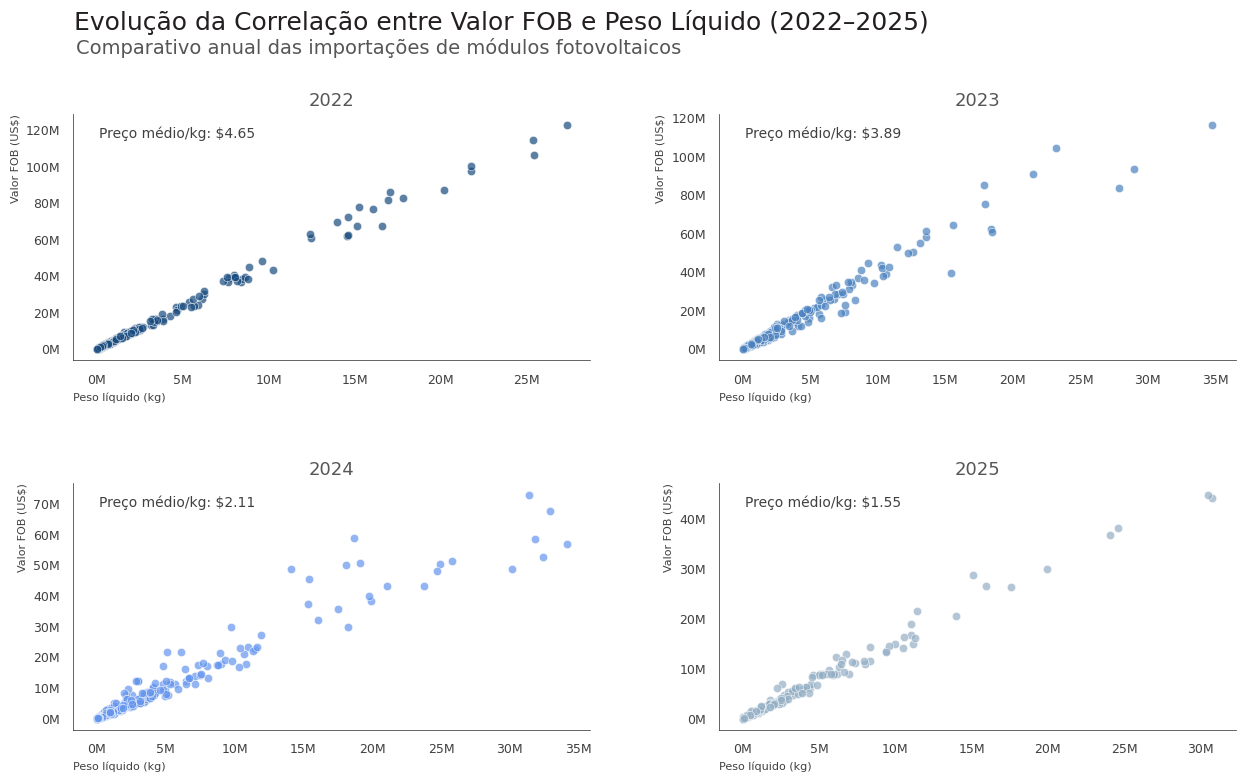

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(15,8))

# Personalização do gráfico
plt.suptitle('Evolução da Correlação entre Valor FOB e Peso Líquido (2022–2025)', size=18, color=CINZA1,
             ha='right', x=0.695 , y=1.01)
plt.title('Comparativo anual das importações de módulos fotovoltaicos',
          fontsize=14, color=CINZA3, pad=30, loc='left', y=2.71, x=-1.245)

def format_millions(value, _):
    return f'{value/1e6:,.0f}M'

formatter = FuncFormatter(format_millions)

# 2022
sns.scatterplot(data=df_pv_22,
                y='VL_FOB',
                x='KG_LIQUIDO',
                color=AZUL1,
                ax=axs[0, 0],
                alpha=0.7)
axs[0, 0].set_title('2022', fontsize=13, color=CINZA3)
axs[0, 0].text(0.05, 0.95, f'Preço médio/kg: ${preco_medio_22:,.2f}',
               transform=axs[0, 0].transAxes, color=CINZA2,
               fontsize=10, va='top')

# 2023
sns.scatterplot(data=df_pv_23,
                y='VL_FOB',
                x='KG_LIQUIDO',
                color=AZUL2,
                ax=axs[0, 1],
                alpha=0.7)
axs[0, 1].set_title('2023', fontsize=13, color=CINZA3)
axs[0, 1].text(0.05, 0.95, f'Preço médio/kg: ${preco_medio_23:,.2f}',
               transform=axs[0, 1].transAxes, color=CINZA2,
               fontsize=10, va='top')

# 2024
sns.scatterplot(data=df_pv,
                y='VL_FOB',
                x='KG_LIQUIDO',
                color=AZUL3,
                ax=axs[1, 0],
                alpha=0.7)
axs[1, 0].set_title('2024', fontsize=13, color=CINZA3)
axs[1, 0].text(0.05, 0.95, f'Preço médio/kg: ${preco_medio_24:,.2f}',
               transform=axs[1, 0].transAxes, color=CINZA2,
               fontsize=10, va='top')

# 2025
sns.scatterplot(data=df_pv_25,
                y='VL_FOB',
                x='KG_LIQUIDO',
                color=AZUL5,
                ax=axs[1, 1],
                alpha=0.7)
axs[1, 1].set_title('2025', fontsize=13, color=CINZA3)
axs[1, 1].text(0.05, 0.95, f'Preço médio/kg: ${preco_medio_25:,.2f}',
               transform=axs[1, 1].transAxes, color=CINZA2,
               fontsize=10, va='top')

for ax in axs.flat:
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlabel('Peso líquido (kg)', fontsize=8, color=CINZA2, loc='left')
    ax.set_ylabel('Valor FOB (US$)', fontsize=8, color=CINZA2, loc='top')
    ax.tick_params(axis='both', labelsize=9, colors=CINZA2)

for ax in axs.flat:
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

plt.subplots_adjust(wspace=0.25, hspace=0.5)

sns.despine()

plt.savefig('distribuicao.png',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.2,
            facecolor='white')

plt.show()

In [44]:
valor_peso_24 = (df_pv['VL_FOB'].sum() / df_pv['KG_LIQUIDO'].sum()).round(2)
valor_peso_24

np.float64(2.11)

In [45]:
valor_peso_23 = (df_pv_23['VL_FOB'].sum() / df_pv_23['KG_LIQUIDO'].sum()).round(2)
valor_peso_23

np.float64(3.89)

In [46]:
valor_peso_22 = (df_pv_22['VL_FOB'].sum() / df_pv_22['KG_LIQUIDO'].sum()).round(2)
valor_peso_22

np.float64(4.65)

In [47]:
valor_peso_25 = (df_pv_25['VL_FOB'].sum() / df_pv_25['KG_LIQUIDO'].sum()).round(2)
valor_peso_25

np.float64(1.55)

# Peso

In [48]:
df_pv_23['KG_LIQUIDO'].sum()

np.int64(989251830)

In [49]:
df_pv['KG_LIQUIDO'].sum()

np.int64(1237972436)

In [50]:
df_pv_25['KG_LIQUIDO'].sum()

np.int64(729489899)

In [51]:
df_pv_anos_liq = pd.concat([df_pv_22, df_pv_23, df_pv, df_pv_25])
df_pv_anos_liq = df_pv_anos_liq.groupby(['CO_ANO', 'CO_MES'])[['VL_FOB', 'VL_FRETE', 'VL_SEGURO', 'KG_LIQUIDO']].sum().reset_index()
df_pv_anos_liq['MES'] = df_pv_anos_liq['CO_MES'].map(meses)
df_pv_anos_liq

,CO_ANO,CO_MES,VL_FOB,VL_FRETE,VL_SEGURO,KG_LIQUIDO,MES
0,2022,4,217831309.0,21906615.0,109827.0,46083330,Abr
1,2022,5,354191848.0,35206890.0,149778.0,76513235,Mai
2,2022,6,405878652.0,40782259.0,149727.0,90336153,Jun
3,2022,7,394604723.0,35815801.0,201323.0,85577219,Jul
4,2022,8,530414392.0,48051849.0,315989.0,114161729,Ago
5,2022,9,370963713.0,37741247.0,185800.0,78254440,Set
6,2022,10,531610379.0,50855277.0,382090.0,114528133,Out
7,2022,11,429786112.0,38860917.0,236132.0,92228811,Nov
8,2022,12,370915087.0,24874926.0,205771.0,78054898,Dez
9,2023,1,322680655.0,13641470.0,275904.0,68086335,Jan


In [52]:
df_pv_anos = df_pv_anos_liq.copy()
df_pv_anos['VL_FOB'] = (df_pv_anos['VL_FOB']/1e6).round(2)
df_pv_anos['Frete e Seguro'] = ((df_pv_anos['VL_FRETE'] + df_pv_anos['VL_SEGURO'])/1e6).round(2)
df_pv_anos = df_pv_anos.rename(columns={'VL_FOB': 'Valor FOB'})
df_pv_anos['Peso (t)'] = (df_pv_anos['KG_LIQUIDO'] / 1000).round(2)

In [53]:
df_pv_anos

,CO_ANO,CO_MES,Valor FOB,VL_FRETE,VL_SEGURO,KG_LIQUIDO,MES,Frete e Seguro,Peso (t)
0,2022,4,217.83,21906615.0,109827.0,46083330,Abr,22.02,46083.33
1,2022,5,354.19,35206890.0,149778.0,76513235,Mai,35.36,76513.24
2,2022,6,405.88,40782259.0,149727.0,90336153,Jun,40.93,90336.15
3,2022,7,394.60,35815801.0,201323.0,85577219,Jul,36.02,85577.22
4,2022,8,530.41,48051849.0,315989.0,114161729,Ago,48.37,114161.73
5,2022,9,370.96,37741247.0,185800.0,78254440,Set,37.93,78254.44
6,2022,10,531.61,50855277.0,382090.0,114528133,Out,51.24,114528.13
7,2022,11,429.79,38860917.0,236132.0,92228811,Nov,39.10,92228.81
8,2022,12,370.92,24874926.0,205771.0,78054898,Dez,25.08,78054.90
9,2023,1,322.68,13641470.0,275904.0,68086335,Jan,13.92,68086.34


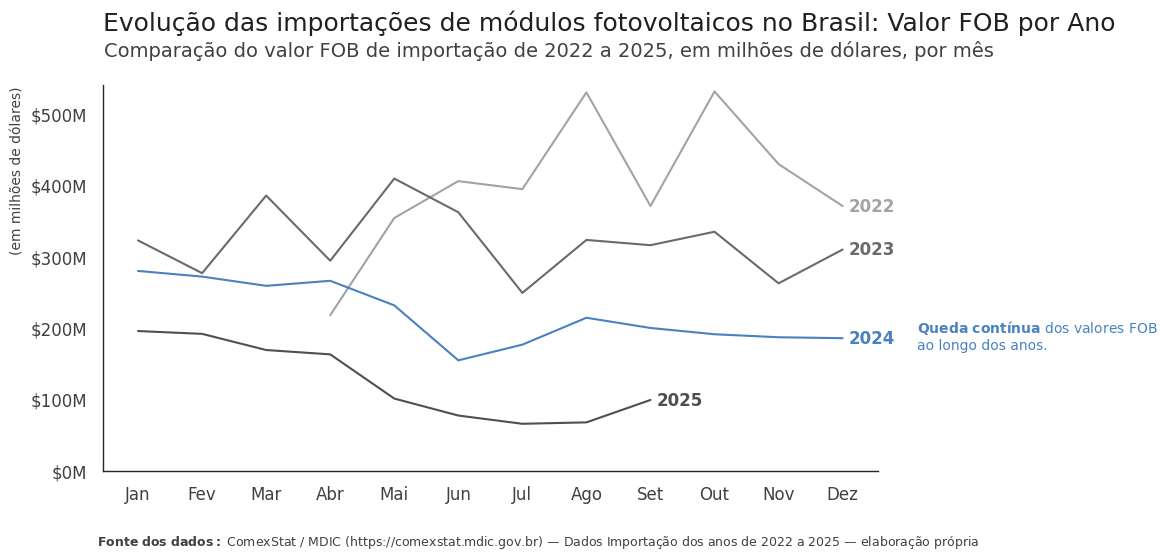

In [54]:
cores = ['#a3a3a3', '#6a6a6a', AZUL2, '#4f4f4f']
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')

ax = sns.lineplot(data=df_pv_anos, x='CO_MES', y='Valor FOB', hue='CO_ANO', palette=cores, lw=1.5, legend=False)

ax.set_title('Evolução das importações de módulos fotovoltaicos no Brasil: Valor FOB por Ano',
             fontsize=18,
             color=CINZA1,
             loc='left',
             pad=40)

ax.text(1.15, 1.09, 'Comparação do valor FOB de importação de 2022 a 2025, em milhões de dólares, por mês',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=14,
        ha='right',
        va='center')

anos = df_pv_anos['CO_ANO'].unique()
for ano, cor in zip(anos, cores):
    df_ano = df_pv_anos[df_pv_anos['CO_ANO'] == ano]
    x_final = df_ano['CO_MES'].max()
    y_final = df_ano[df_ano['CO_MES'] == x_final]['Valor FOB'].values[0]
    ax.text(
        x_final + 0.1,
        y_final,
        str(ano),
        color=cor,
        fontsize=12,
        va='center',
        fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('(em milhões de dólares)', fontsize=10, color=CINZA2, labelpad=5, loc='top')
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=5)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=5)
ax.set_xticks(df_pv_anos['CO_MES'].unique())
ax.set_xticklabels(df_pv_anos['MES'].unique())

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:.0f}M'))

for spine in ax.spines.values():
    spine.set_linewidth(1)

plt.ylim(0,540)

sns.despine()

ax.text(1.05, 0.35,
        '$\\bf{Queda}$ $\\bf{contínua}$ dos valores FOB\nao longo dos anos.',
        transform=ax.transAxes,
        fontsize=10,
        ha='left',
        va='center',
        color=AZUL2)

plt.figtext(0.56, -0.039,
            '$\\bf{Fonte}$ $\\bf{dos}$ $\\bf{dados:}$ ComexStat / MDIC (https://comexstat.mdic.gov.br) — Dados Importação dos anos de 2022 a 2025 — elaboração própria',
            ha='center', fontsize=9, color=CINZA2)

plt.savefig('fob_anos.png',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.2,
            facecolor='white')

plt.show()

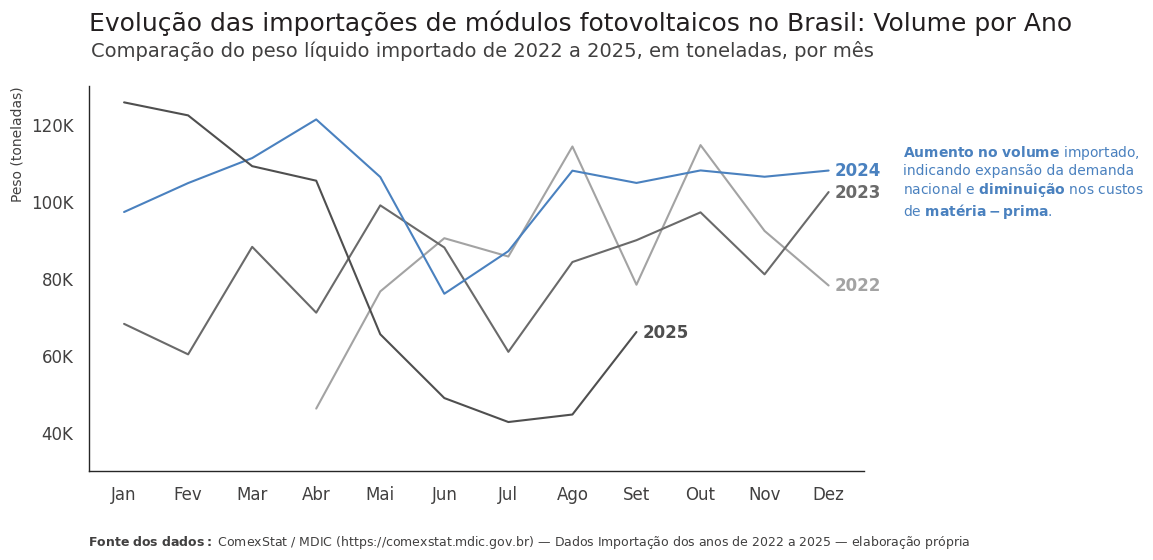

In [55]:
cores = ['#a3a3a3', '#6a6a6a', AZUL2, '#4f4f4f']
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')

ax = sns.lineplot(data=df_pv_anos, x='CO_MES', y='Peso (t)', hue='CO_ANO', palette=cores, lw=1.5, legend=False)

ax.set_title('Evolução das importações de módulos fotovoltaicos no Brasil: Volume por Ano',
             fontsize=18,
             color=CINZA1,
             loc='left',
             pad=40)

ax.text(1.013, 1.09, 'Comparação do peso líquido importado de 2022 a 2025, em toneladas, por mês',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=14,
        ha='right',
        va='center')

anos = df_pv_anos['CO_ANO'].unique()
for ano, cor in zip(anos, cores):
    df_ano = df_pv_anos[df_pv_anos['CO_ANO'] == ano]
    x_final = df_ano['CO_MES'].max()
    y_final = df_ano[df_ano['CO_MES'] == x_final]['Peso (t)'].values[0]
    ax.text(
        x_final + 0.1,
        y_final,
        str(ano),
        color=cor,
        fontsize=12,
        va='center',
        fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Peso (toneladas)', fontsize=10, color=CINZA2, labelpad=5, loc='top')
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=5)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2, pad=5)
ax.set_xticks(df_pv_anos['CO_MES'].unique())
ax.set_xticklabels(df_pv_anos['MES'].unique())

plt.ylim(30000,130000)

for spine in ax.spines.values():
    spine.set_linewidth(1)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

sns.despine()

ax.text(1.05, 0.75,
        '$\\bf{Aumento}$ $\\bf{no}$ $\\bf{volume}$ importado,\nindicando expansão da demanda\nnacional e $\\bf{diminuição}$ nos custos\nde $\\bf{matéria-prima}$.',
        transform=ax.transAxes,
        fontsize=10,
        ha='left',
        va='center',
        color=AZUL2)

plt.figtext(0.565, -0.039,
            '$\\bf{Fonte}$ $\\bf{dos}$ $\\bf{dados:}$ ComexStat / MDIC (https://comexstat.mdic.gov.br) — Dados Importação dos anos de 2022 a 2025 — elaboração própria',
            ha='center', fontsize=9, color=CINZA2)

plt.savefig('peso_anos.png',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.2,
            facecolor='white')

plt.show()

# Peso Médio

In [56]:
peso_medio = df_pv_anos_liq.groupby(['CO_ANO'])[['VL_FOB', 'VL_FRETE', 'VL_SEGURO', 'KG_LIQUIDO']].sum()
peso_medio

,VL_FOB,VL_FRETE,VL_SEGURO,KG_LIQUIDO
CO_ANO,,,,
2022,3.606196e+09,334095781.0,1936437.0,775737948
2023,3.846770e+09,116338804.0,2178394.0,989251830
2024,2.617336e+09,256631526.0,1477206.0,1237972436
2025,1.129084e+09,132853644.0,735462.0,729489899


In [57]:
peso_medio['PESO_MEDIO'] = (peso_medio['VL_FOB'] / peso_medio['KG_LIQUIDO']).round(2)

In [58]:
peso_medio['VL_FOB'] = (peso_medio['VL_FOB']/1e9).round(2)

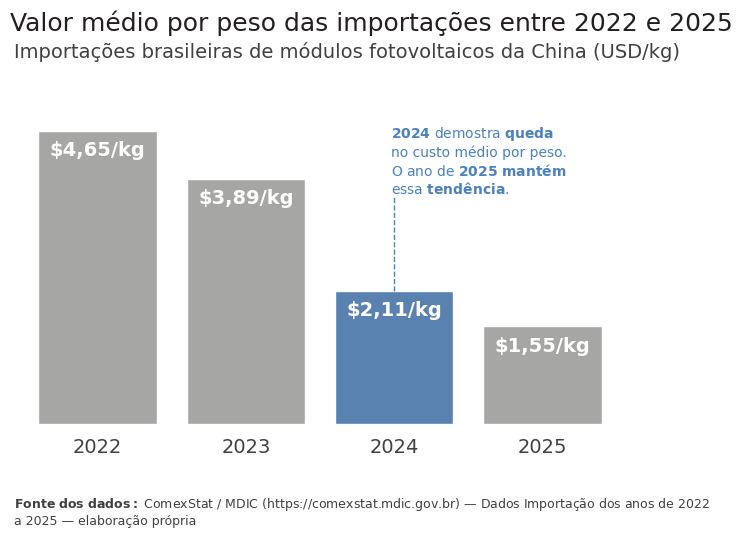

In [187]:
cores = []
for ano in peso_medio.index:
    if ano == 2024:
        cores.append(AZUL2)
    else:
        cores.append(CINZA4)

fig, ax = plt.subplots(figsize=(8,4))
sns.set_theme(style='white')

ax = sns.barplot(data=peso_medio,
                 x=peso_medio.index,
                 y='PESO_MEDIO',
                 palette=cores,
                 hue=peso_medio.index,
                 legend=False)

ax.set_title('Valor médio por peso das importações entre 2022 e 2025',
             fontsize=18,
             color=CINZA1,
             loc='left',
             pad=40,
             y=1.1)

ax.text(1.08, 1.21, 'Importações brasileiras de módulos fotovoltaicos da China (USD/kg)',
        transform=ax.transAxes,
        color=CINZA2,
        fontsize=14,
        ha='right',
        va='center')

ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
sns.despine(bottom=True, left=True)

ax.set_yticklabels([])

for i, valor in enumerate(peso_medio['PESO_MEDIO']):
    qtd = f'${valor:,.2f}/kg'.replace('.',',')
    offset = 0.3
    ax.text(i, valor - offset, qtd, color=BRANCO, fontsize=14,
            ha='center', va='center', fontweight='bold')

plt.figtext(0.13, -0.14,
            '$\\bf{Fonte}$ $\\bf{dos}$ $\\bf{dados:}$ ComexStat / MDIC (https://comexstat.mdic.gov.br) — Dados Importação dos anos de 2022\na 2025 — elaboração própria',
            ha='left', fontsize=9, color=CINZA2)

# Localiza a posição x da barra 2024
x_2024 = list(peso_medio.index).index(2024)  # posição da barra
y_2024 = peso_medio.loc[2024, 'PESO_MEDIO']  # altura da barra

# Desenha a linha vertical pontilhada
ax.vlines(x=x_2024,
          ymin=y_2024,        # topo da barra
          ymax=y_2024 + 1.5,    # altura final desejada (ajuste conforme necessário)
          colors=AZUL2,
          linestyles='dashed',
          linewidth=1)

# Adiciona anotação no topo
ax.text(x_2024 - 0.02, y_2024 + 1.5, '$\\bf{2024}$ demostra $\\bf{queda}$\nno custo médio por peso.\nO ano de $\\bf{2025}$ $\\bf{mantém}$\nessa $\\bf{tendência}$.',
        color=AZUL2, fontsize=10, ha='left', va='bottom')

plt.savefig('valor_peso_medio.png',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.2,
            facecolor='white')

plt.show()